In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In this notebook, we will combine advanced NBA metrics to form a single metric with Principal Component Analysis
--

In [4]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10000)
target = pd.read_csv('/Users/mattlee/GA-Capstone-Project/avg5metricsedit.csv')

In [5]:
target.head()

,Name,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,eFG%
0,A.J. Price,47.0,721.0,11.66,0.4816,0.4852,0.1718,1.84,9.06,5.40,23.00,1.50,0.16,13.28,20.86,1.1,3.2,4.4,0.0440,-0.66,-2.32,-2.98,-0.3,0.4562
1,Aaron Gray,47.8,596.6,12.82,0.5360,0.0022,0.3628,13.64,23.52,18.56,8.36,1.38,2.02,19.14,15.90,1.5,4.1,5.5,0.0952,-2.34,1.00,-1.32,0.3,0.5168
2,Aaron Mckie,68.0,1496.6,11.76,0.4844,0.1694,0.2526,3.80,12.56,8.14,15.76,2.70,0.78,15.48,15.44,3.1,10.5,13.8,0.0898,-1.60,1.54,-0.04,3.7,0.4442
3,Adam Keefe,72.8,1241.0,13.24,0.5694,0.0042,0.5914,12.16,18.62,15.42,5.48,1.58,1.26,16.96,15.18,7.9,7.8,15.7,0.1190,-1.04,0.50,-0.54,2.9,0.5122
4,Adonal Foyle,62.4,1173.2,11.74,0.4470,0.0012,0.2892,11.30,18.60,14.80,4.34,1.08,6.34,16.78,13.94,-1.4,6.2,4.8,0.0388,-4.54,2.48,-2.08,0.2,0.4408


In [22]:
df1 = target[['PER','TS%','3PAr','FTr','TRB%','AST%','STL%','BLK%','TOV%','USG%',
             'WS/48','BPM','VORP','eFG%']]

In [23]:
pca = PCA(n_components=1)

In [24]:
pca.fit_transform(df1)

array([[  7.9220051 ],
       [ -7.80300529],
       [  2.01078977],
       [ -8.60904544],
       [-11.50933454],
       [ -6.32659044],
       [  1.30006447],
       [ -5.76437012],
       [ -6.68321571],
       [ -6.9515501 ],
       [  0.43881276],
       [  1.69419169],
       [ 22.49046268],
       [ -0.27437122],
       [  8.93843696],
       [ -3.64599625],
       [ -6.5370474 ],
       [ -8.65065842],
       [ -3.11453722],
       [ -8.02422025],
       [ 12.20580714],
       [ 27.2861483 ],
       [ -5.87215494],
       [  0.60896184],
       [ -5.78660987],
       [ -8.99683944],
       [ -7.82951392],
       [-10.65126888],
       [ -7.33609597],
       [ 21.23524393],
       [ -1.67106613],
       [  3.97919019],
       [  4.84007211],
       [-13.00980822],
       [  2.31429802],
       [ -6.3434854 ],
       [  8.91148867],
       [ -8.05077767],
       [ 10.27298225],
       [ -9.86779809],
       [ -2.42540902],
       [ -3.24036255],
       [ -5.60957504],
       [ -6

In [25]:
pca.explained_variance_ratio_

array([ 0.54249907])

**Variance is too low to use**

In [4]:
df = target[['Name','PER','WS','WS/48','BPM','VORP']].copy()

**We need to standardize the data first**

In [9]:
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/normalizedtest.csv')
df.head()

,PER,WS,WS/48,BPM,VORP,Total,TotalWS,TotalWS48,Name
0,0.395012,0.083958,0.531904,0.538026,0.137856,1.686755,1.154851,1.602797,A.J. Price
1,0.441673,0.100450,0.662583,0.610373,0.150985,1.966063,1.303480,1.865614,Aaron Gray
2,0.399035,0.224888,0.648800,0.666158,0.225383,2.164264,1.515463,1.939376,Aaron Mckie
3,0.458568,0.253373,0.723328,0.644367,0.207877,2.287514,1.564186,2.034141,Adam Keefe
4,0.398230,0.089955,0.518632,0.577250,0.148796,1.732864,1.214232,1.642908,Adonal Foyle


In [17]:
pca = PCA(n_components=1)

In [10]:
x = df[['PER','WS','BPM','VORP']]
x1 = df[['PER','WS/48','BPM','VORP']]

In [18]:
pcaws = pca.fit_transform(x)

In [19]:
pca.explained_variance_ratio_

array([ 0.87829031])

In [14]:
pca1 = PCA(n_components=1)

In [16]:
pcaws48 = pca1.fit_transform(x1)

In [20]:
pca1.explained_variance_ratio_

array([ 0.83764846])

**We will add these to our dataframe**

In [21]:
df['TotalPCAWS'] = pcaws

In [23]:
df['TotalPCAWS48'] = pcaws48

In [24]:
df.to_csv('pcatest.csv', index = False)

In [26]:
pca.components_

array([[ 0.48271603,  0.63967451,  0.39218357,  0.45165673]])

(array([  15.,   97.,  187.,  143.,   83.,   38.,   23.,    9.,    1.,    3.]),
 array([-0.57677961, -0.40041387, -0.22404813, -0.0476824 ,  0.12868334,
         0.30504908,  0.48141481,  0.65778055,  0.83414629,  1.01051202,
         1.18687776]),
 <a list of 10 Patch objects>)

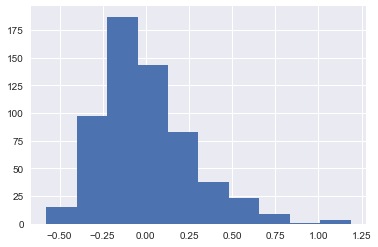

In [28]:
plt.hist(df['TotalPCAWS'])

(array([   6.,    8.,   56.,  146.,  198.,  108.,   50.,   20.,    3.,    4.]),
 array([-0.7721628 , -0.60074855, -0.4293343 , -0.25792005, -0.0865058 ,
         0.08490845,  0.2563227 ,  0.42773695,  0.5991512 ,  0.77056545,
         0.9419797 ]),
 <a list of 10 Patch objects>)

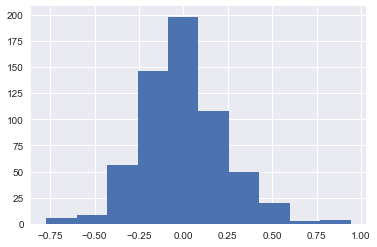

In [29]:
plt.hist(df['TotalPCAWS48'])

**We will use PCA on the offense metrics**

In [37]:
off = pd.read_csv('/Users/mattlee/GA-Capstone-Project/normalizedoffense.csv')

In [63]:
offx = off[['eFG%','TS%','FTr','USG%']]

In [64]:
pcaoff = PCA(n_components=1)

In [65]:
pcaoff1 = pcaoff.fit_transform(offx)

In [66]:
pcaoff.explained_variance_ratio_

array([ 0.38514884])

In [42]:
deff = pd.read_csv('/Users/mattlee/GA-Capstone-Project/normalizeddefense.csv')

In [51]:
deffx = deff[['DRB%','DBPM','DWS']]

In [52]:
pcadeff = PCA(n_components=1)

In [53]:
pcadeff1 = pcadeff.fit_transform(deffx)

In [54]:
pcadeff.explained_variance_ratio_

array([ 0.67366211])

**The explained variance is a bit too low to use**